In [1]:
import numpy as np 
from Utils import *
from scipy.optimize import minimize
from iADM import *
import matplotlib.pyplot as plt

In [2]:
def coherence(a):
  L=[]
  for i in range(1,len(a)):
    L.append(np.abs(a@ np.roll(a,i)))
  return max(L)

In [3]:
def shiftrecovery(a0,a):
      # Given The ground truth , recovers the shift signal 
      # Give the Correlation beetween shifted signal and ground truth and returns also the recovered signal
   
    
      Corr=np.correlate(a0, a, mode='full')
      
      ind = np.argmax(np.abs(Corr))
      
      Corr_max = Corr[ind]
     
     
        
      if ind -len(a0) >= 0:
          a_shift = np.sign(Corr_max)*np.roll(a, -(len(a0)-ind-1) ) 
      else:
          a_shift = np.sign(Corr_max)*np.roll(a, ind-len(a0)+1 )
        


      return a_shift,Corr_max*np.sign(Corr_max)

In [4]:
p=4
N=9
theta=0.5  ###Set Sparsity

              
a=np.random.normal(0,1,p)

x=BG(theta,N)*norm(a)              #### Bernouilli Gaussion 
a=a/norm(a)

y=Conv(a,x)

a0=pad(y,p)/norm(pad(y,p))   
          #### Padding and normalizing the truncated version of y
x1=np.zeros(N+2*p)        

ypad=np.pad(y,(p,p),constant_values=0)

lam=0.1/np.sqrt(p*theta)    

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2    ####Greedy initialization

res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})

x0=res.x    

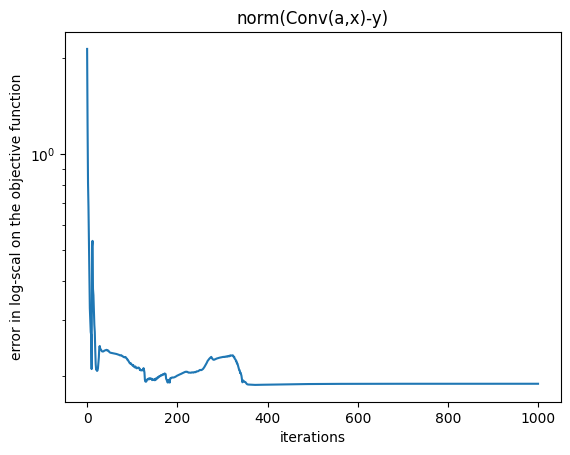

In [5]:

A,X,L=iADM(ypad,a0,x0,1000,0.1/np.sqrt(theta*p),False)

plt.semilogy(L)
plt.xlabel('iterations')
plt.ylabel('error in log-scal on the objective function')
plt.title('norm(Conv(a,x)-y)')
plt.show()

-7.99158016546261 -0.16251892949777494
49


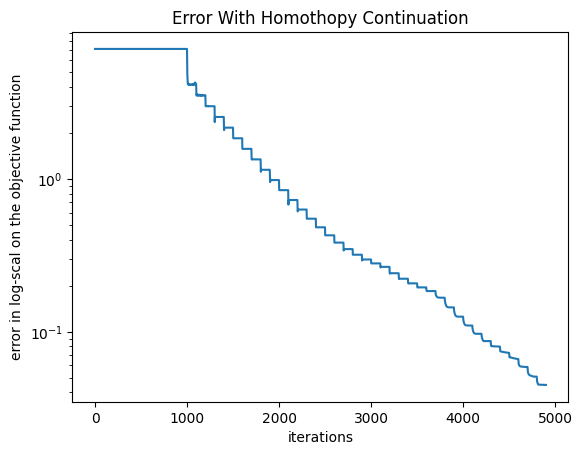

In [6]:
lam0=coherence(ypad)
lamf=0.01/np.sqrt(p*theta)
print(np.log(lamf/lam0),np.log(0.85))
At,Xt,E=homotopy(ypad,a0,x0,lam0,lamf)
import matplotlib.pyplot as plt
plt.semilogy(E)
plt.xlabel('iterations')
plt.ylabel('error in log-scal on the objective function')
plt.title('Error With Homothopy Continuation')
plt.show()


In [29]:
def test(p):
    L=[]
    for i in range(100):
        a=np.random.normal(0,1,p)
        a=a/norm(a)
        c=coherence(a)
        L.append(c)
    return np.array(L)

In [46]:

p=10000
L=test(p)
print(np.mean(L)/(1/np.sqrt(p)))


3.8335290148807992


QUESTION 4 : SUCCESS WHEN a INCOHERENT

In [8]:
p=4
N=15
theta=0.1/np.sqrt(p)  

               ###Set Sparsity
a=np.random.normal(0,1,p)

x=BG(theta,N)     #### Bernouilli Gaussion 
a=a/norm(a)
y=Conv(a,x)
while coherence(a) > 0.5/np.sqrt(p) or norm(pad(y,p)) == 0:   #### Choose incoherent solution

    a=np.random.normal(0,1,p)

    x=BG(theta,N)     #### Bernouilli Gaussion 
    a=a/norm(a)
    y=Conv(a,x)

y=Conv(a,x)
a0=pad(y,p)/norm(pad(y,p)) #### Padding and normalizing the truncated version of y
x1=np.zeros(N+2*p)        

ypad=np.pad(y,(p,p),constant_values=0)

lam=0.1/np.sqrt(p*theta)    

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2
 ####Greedy initialization

res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})

x0=res.x 
A,X,L=iADM(ypad,a0,x0,1000,0.1/np.sqrt(theta*p),False)
A,sol1=shiftrecovery(a,A)
X,sol2=shiftrecovery(x,X)
                        

#### We consider that the algorithm suceeds when Max correlation is higher than 0.95
print(sol1, 'Max Correlation when a is incoherent')

1.0 Max Correlation when a is incoherent


QUESTION 4 : WHEN A IS HIGHLY COHERENT

In [10]:
p=5
N=10
theta=0.1/np.sqrt(p)

               
a=np.random.normal(0,1,p)                 ###Set Sparsity

x=BG(theta,N)                           #### Bernouilli Gaussion 
a=a/norm(a)
while np.abs(coherence(a)) < 2/np.sqrt(p)    or norm(pad(y,p)) == 0:   #### Choose coherent solution

    a=np.random.normal(0,1,p)

    x=BG(theta,N)     
    a=a/norm(a)
    y=Conv(a,x)
print(coherence(a)) 
y=Conv(a,x)
a0=pad(y,p)/norm(pad(y,p))                                                      #### Padding and normalizing the truncated version of y
x1=np.zeros(N+2*p)        

ypad=np.pad(y,(p,p),constant_values=0)

lam=0.1/np.sqrt(p*theta)    

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2        

res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})


x0=res.x                                                                            ####Greedy initialization
A,X,L=iADM(ypad,a0,x0,1000,lam,False)

X,sol2=shiftrecovery(x,X)
a=np.pad(a,(0,2*p))
A,sol1=shiftrecovery(a,A )     

#### We consider that the algorithm suceeds when Max correlation is higher than 0.95
print(sol1, 'Max Correlation when a is highly coherent')

0.9313083566168614
0.9400869281877383 Max Correlation when a is highly coherent


In [81]:
## Could be used to generate Coherent Signals 
import numpy as np
from scipy.signal import gaussian

# Define parameters for Gaussian window function
window_length = 5  # length of the window
std_dev = 0.6  # standard deviation of the Gaussian function

# Generate the Gaussian window function
gaussian_window = gaussian(window_length, std_dev)

# Normalize the window function so that the sum of its values is 1
gaussian_window /= norm(gaussian_window)




print("Coherent kernel:")
print(gaussian_window)
print(coherence(gaussian_window))

Coherent kernel:
[0.00364582 0.23515602 0.94306771 0.23515602 0.00364582]
0.4452640618275057


In [201]:
#### Estimate the probability of recovery in function of p and theta 
#### Weak estimation of the probability due to low iteration number 

def draw(p,theta):
    N=35
    Success=0
    for i in range(4):        
        a=np.random.normal(0,1,p)
       
        x=BG(theta,N)
        a=a/norm(a) 
        y=Conv(a,x)
        while norm(pad(y,p)) == 0: 
            a=np.random.normal(0,1,p)
            
            x=BG(theta,N)
            a=a/norm(a)
            y=Conv(a,x)

        a0=pad(y,p)/norm(pad(y,p)) #### Padding and normalizing the truncated version of y
        x1=np.zeros(N+2*p)        

        ypad=np.pad(y,(p,p),constant_values=0)

        lam=0.1/np.sqrt(p*theta)    

        f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2    ####Greedy initialization

        res = minimize(f_x_ini, x1, method='nelder-mead',
                    options={'xatol': 1e-3})

        x0=res.x 
        
        A,X,L=iADM(ypad,a0,x0,700,lam)
        A,sol1=shiftrecovery(a,A)
        X,sol2=shiftrecovery(x,X)
        print(sol1)
        if sol1 > 0.95:
            Success+=1
    
    return Success/4

In [202]:
##### Take too much time to compute
p=np.arange(5,10)
theta=np.linspace(0.2,0.9,5)
print(len(p),len(theta))
T=np.zeros((10,10))
for i in range(len(p)):
    for k in range(len(theta)):
        T[i][k]=draw( p[i],theta[k]) 



5 5
0.9761450761998345
0.9880645813700298
0.9316895682993415
0.9973265046662091
0.8361885818371665
0.9937815450306452
0.7400117741598806
0.8936252633683442
0.8710428548962486
0.7189534131359396
0.6365665564891297
0.9751491486695806
0.6601025974908528
0.6685165616336912
0.9217954107286382
0.8141883629331543
0.6374911073871946
0.7330427398462996
0.9112566632137139
0.801553194559001
0.7312830977627135
0.9735018444362762
0.9359282657837436
0.9897485121551362
0.9749643451688381
0.7758516710077052
0.9048550690485287
0.64888251038967
0.9597243384381807
0.9489806411046823
0.7316800293512907
0.7244661581671477
0.8735937756389494
0.7558469892288698
0.7339582939563962
0.7296971015364061
0.8232497875347443
0.5797532852839102
0.5761661254127428
0.7048725101466906
0.9409203427170577
0.9884913651773983
0.9476376916871737
0.9781784948559301
0.6793544550454987
0.9799486953939862
0.885198602876412
0.8001302789009651
0.6045187090647581
0.659527296966445
0.7689706362485912
0.4950088834804573
0.81588404609

In [205]:
print(T[:5,:5])

[[0.75 0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.5  0.   0.   0.   0.  ]]


In [207]:
B=T[:5,:5]

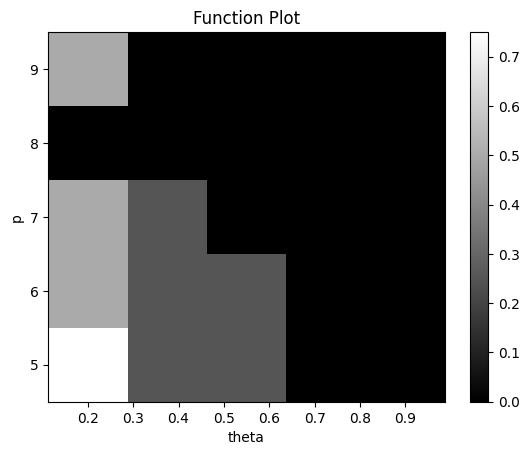

In [221]:


p=np.arange(5,10)
theta=np.linspace(0.2,0.9,5)
X, Y = np.meshgrid(theta, p)

# Plot the function values
plt.pcolormesh(X, Y, B, cmap='gray')  # Use pcolormesh to create a color plot
plt.colorbar()  # Add a colorbar
plt.xlabel('theta')  # Add x-axis label
plt.ylabel('p')  # Add y-axis label
plt.title('Probability of recovering signal in function of theta and p')  # Add plot title
plt.show()  # Display the plot

In [ ]:
### The probabiities 